In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

In [2]:
np.random.seed(42)
w1 = np.random.random([2,3])
w2 = np.random.random([1,3])

w1_init = w1.copy()
w2_init = w2.copy()

x,y = np.array([[0,0],[0,1],[1,0],[1,1]]),np.array([0,1,1,0])
# x,y = np.array([0,0]), np.array([0])
if len(x.shape)<2:
    x = x.reshape(1,len(x))
y = y.reshape(len(x),1)


x.shape,y.shape

((4, 2), (4, 1))

In [3]:
def inference(x,w1,w2):
    bias = np.ones([x.shape[0],1])
    
    # forward pass
    # first layer
    i1 = np.concatenate([bias,x],axis=1)
    a1 = i1@w1.T
    h1 = sigmoid(a1)
    # second layer
    i2= np.concatenate([bias,h1],axis=1)
    a2 = i2@w2.T
    h2 = sigmoid(a2)

    # y_preds = np.where(h2>0.5,1,0)
    return h2
y_pred = inference(x,w1,w2)
y_pred.shape, y_pred

((4, 1),
 array([[0.72297568],
        [0.753594  ],
        [0.75974585],
        [0.77812631]]))

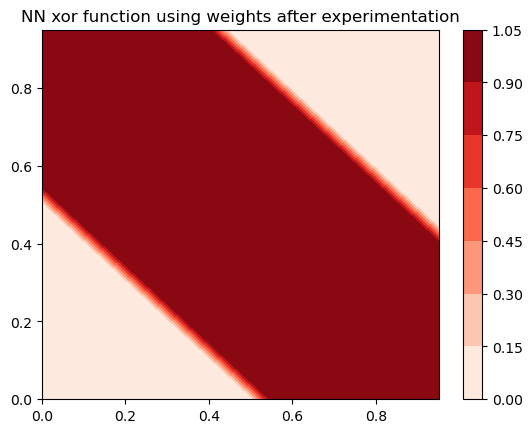

In [4]:
a = 20
#first neuron should activate on 1,1 and second 0,0 then we can combine is 2nd layer
w1_mine = np.array([[-0.6*a,a,a],[1.3*a,-a,-a]])
w2_mine = np.array([-6.,5.,5.]).reshape(1,3)
w1_mine,w2_mine


xmin = 0
xmax = 1
x1_points = np.arange(xmin,xmax,0.05)
x2_points = np.arange(xmin,xmax,0.05)
xx,yy = np.meshgrid(x1_points,x2_points)
r1,r2 = xx.flatten(),yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
grid_vals = inference(grid,w1_mine,w2_mine)
grid_vals = np.where(grid_vals>0.5,1,0)
zz = grid_vals.reshape(xx.shape)
plt.contourf(xx,yy,zz,cmap='Reds')
plt.colorbar()
plt.title("NN xor function using weights after experimentation")
plt.show()

In [5]:
def error(y_pred,y_real):
    return np.sum((y_real-y_pred)**2)
error(y_pred,y)
y_pred

array([[0.72297568],
       [0.753594  ],
       [0.75974585],
       [0.77812631]])

In [6]:
def gradients(x,w1,w2,y):
    if len(x.shape)<2:
        x = x.reshape(1,len(x))
    if len(y.shape)<2:
        y = y.reshape(1,len(y))

    bias = np.ones([x.shape[0],1])
    
    # forward pass
    # first layer
    i1 = np.concatenate([bias,x],axis=1)
    a1 = i1@w1.T
    s1 = sigmoid(a1)
    # second layer
    i2= np.concatenate([bias,s1],axis=1)
    a2 = i2@w2.T
    s2 = sigmoid(a2)


    # backward pass
    # second layer back
    out_error = y - s2
    gso = d_sigmoid(a2) # gradients sigmoid outpus
    dout = out_error*gso
    # diff = diff.sum(axis=1)
    # grad_diff = grad_diff.sum(axis=1)
    dw2 = dout.T@i2/i2.shape[0] # (3,4)@(4,1) --> (3,1) == w2.shape [✔]

    # first layer back
    Σdw = dout@w2
    Σdw = Σdw[:,1:] # ignore bias because it doesnt go back
    gs2 = d_sigmoid(a1)
    d2 = Σdw*gs2 # (4,2)*(4,2) --> (4,2) = (input_size,node_size) [✔]
    
    # weight diffs
    dw1 = d2.T@i1/i1.shape[0] #(3,4)@(4,2) --> (3,2) == w1.shape  [✔]
    return dw1,dw2
dw1,dw2 = gradients(x,w1_mine,w2_mine,y)
dw1.shape,dw2.shape

((2, 3), (1, 3))

In [7]:
losses = []
target_error = 0.01
def backpropagation(x,w1,w2,y,lr=10):
    w1,w2 = w1_init.copy(),w2_init.copy()
    for iter in range(10000):
        dw1, dw2 = gradients(x,w1,w2,y)
        w1 += lr*dw1
        w2 += lr*dw2
        pred = inference(x,w1,w2)
        loss = error(pred,y)
        losses.append(loss)
        if loss<target_error:
            print(f"Stoping @ {iter} with loss {loss:.7f}")
            break
    return w1,w2

The model has it's own "logic" around detecting the inputs. It doesnt follow the logic i tried with detecting 0,0 and 1,1 but it still gives similar results

Stoping @ 418 with loss 0.0099971


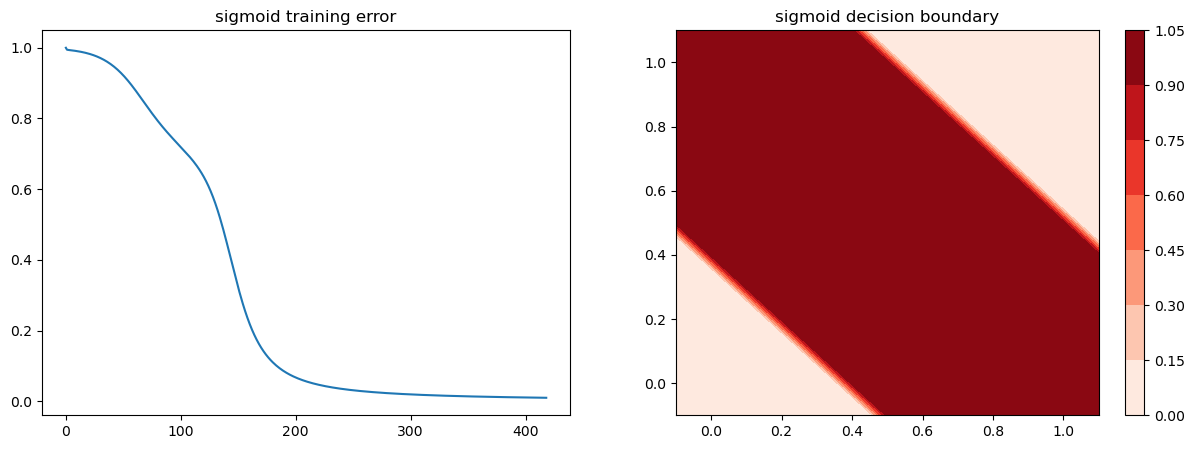

In [8]:
w1,w2 = backpropagation(x,w1,w2,y)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("sigmoid training error")
plt.plot(losses)

xmin = -0.1
xmax = 1.1
x1_points = np.arange(xmin,xmax,0.05)
x2_points = np.arange(xmin,xmax,0.05)
xx,yy = np.meshgrid(x1_points,x2_points)
r1,r2 = xx.flatten(),yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))

grid_vals = inference(grid,w1,w2)
grid_vals = np.where(grid_vals>0.5,1,0)
zz = grid_vals.reshape(xx.shape)
grid_vals.shape,zz.shape
plt.subplot(122)
plt.title("sigmoid decision boundary")
plt.contourf(xx,yy,zz,cmap='Reds')
plt.colorbar()
plt.plot()
plt.savefig("img/sigmoid_training.png")
plt.show()

In [9]:
#lazy approach
i = 0
np.random.seed(42)
w1 = np.random.random([2,3])
w2 = np.random.random([1,3])
pred = inference(x,w1,w2)
loss = error(pred,y)
min_loss = float("inf")
while loss>target_error:
    i+=1
    w1 = 20*(np.random.random([2,3])-0.5)
    w2 = 20*(np.random.random([1,3])-0.5)
    pred = inference(x,w1,w2)
    loss = error(pred,y)
    if loss<min_loss:
        min_loss = loss
    if i%10000==0:
        print(f"{min_loss} best loss after {i} tries")
    if i>100_000_000:
        print("i'm tired")
        break
print(min_loss,i) 
#i'm tired96013422 best loss after 100000000 tries
#0.509885696013422 100000001 tries

0.10441821975086624 best loss after 10000 tries
0.10441821975086624 best loss after 20000 tries
0.10441821975086624 best loss after 30000 tries
0.02754874406122382 best loss after 40000 tries
0.02754874406122382 best loss after 50000 tries
0.02754874406122382 best loss after 60000 tries
0.02754874406122382 best loss after 70000 tries
0.005903942464939896 75130


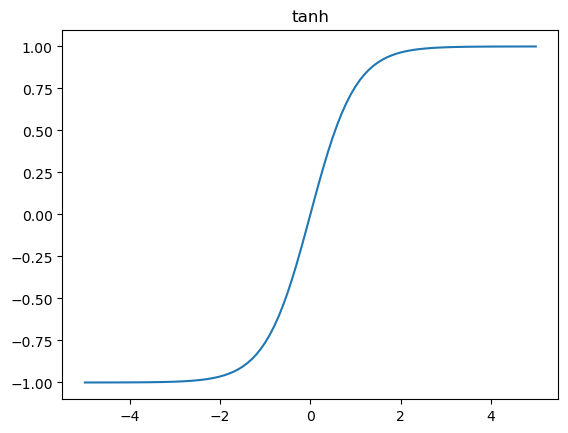

In [10]:
#TODO tanh & relu
def tanh(x):
    return (np.exp(2*x)-1)/(np.exp(2*x)+1)
def relu(x):
    return (x>0)*x


def d_tanh(x):
    return 1-tanh(x)*tanh(x)
def d_relu(x):
    return x>0
data = np.arange(-5,5.1,0.1)
func = tanh(data)
plt.plot(data,func)
plt.title("tanh")
plt.show()

In [11]:
def inference_a(x,w1,w2,activation=sigmoid):
    bias = np.ones([x.shape[0],1])
    
    # forward pass
    # first layer
    i1 = np.concatenate([bias,x],axis=1)
    a1 = i1@w1.T
    h1 = activation(a1)
    # second layer
    i2= np.concatenate([bias,h1],axis=1)
    a2 = i2@w2.T
    h2 = activation(a2)

    # y_preds = np.where(h2>0.5,1,0)
    return h2
y_pred = inference_a(x,w1,w2,relu)
y_pred.shape, y_pred

((4, 1),
 array([[-0.        ],
        [-0.        ],
        [ 3.30222522],
        [-0.        ]]))

In [12]:
def gradients_a(x,w1,w2,y,activation,d_activation):
    if len(x.shape)<2:
        x = x.reshape(1,len(x))
    if len(y.shape)<2:
        y = y.reshape(1,len(y))

    bias = np.ones([x.shape[0],1])
    
    # forward pass
    # first layer
    i1 = np.concatenate([bias,x],axis=1)
    a1 = i1@w1.T
    s1 = activation(a1)
    # second layer
    i2= np.concatenate([bias,s1],axis=1)
    a2 = i2@w2.T
    s2 = activation(a2)

    # backward pass
    # second layer back
    out_error = y - s2
    gso = d_activation(s2) # activation gradients for output layer
    dout = out_error*gso
    # diff = diff.sum(axis=1)
    # grad_diff = grad_diff.sum(axis=1)
    dw2 = dout.T@i2/i2.shape[0] # (3,4)@(4,1) --> (3,1) == w2.shape [✔]

    # first layer back
    Σdw = dout@w2
    Σdw = Σdw[:,1:] # ignore bias because it doesnt go back
    gs2 = d_activation(s1)
    d2 = Σdw*gs2 # (4,2)*(4,2) --> (4,2) = (input_size,node_size) [✔]
    
    # weight diffs
    dw1 = d2.T@i1/i1.shape[0] #(3,4)@(4,2) --> (3,2) == w1.shape  [✔]
    return dw1,dw2

In [13]:
losses_sigmoid = []
target_error = 0.01
def backpropagation(x,w1,w2,y,a=sigmoid,da=d_sigmoid,lr=0.1,start_over=True):
    global losses_sigmoid
    if start_over:
        losses_sigmoid = []
        w1,w2 = w1_init.copy(),w2_init.copy()
    for iter in range(20000):
        dw1, dw2 = gradients_a(x,w1,w2,y,a,da)
        w1 += lr*dw1
        w2 += lr*dw2
        pred = inference_a(x,w1,w2,a)
        loss = error(pred,y)
        losses_sigmoid.append(loss)
        if loss<target_error:
            print(f"Stoping @ {iter} with loss {loss:.7f}")
            break
    return w1,w2

Stoping @ 1589 with loss 0.0099896


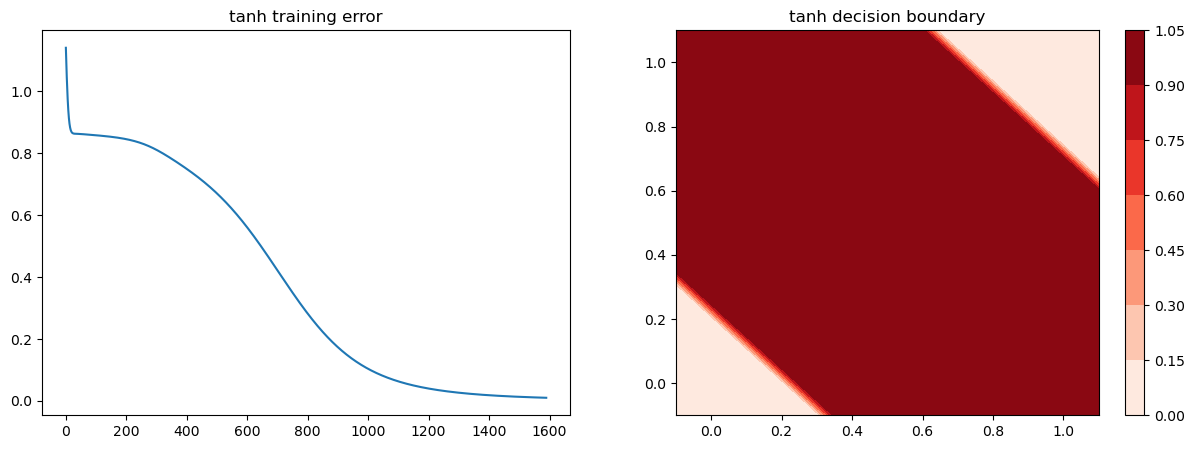

In [14]:
a,da = tanh,d_tanh
w1,w2 = backpropagation(x,w1,w2,y,a,da)

xmin = -0.1
xmax = 1.1
x1_points = np.arange(xmin,xmax,0.05)
x2_points = np.arange(xmin,xmax,0.05)
xx,yy = np.meshgrid(x1_points,x2_points)
r1,r2 = xx.flatten(),yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))


grid_vals = inference_a(grid,w1,w2,a)
grid_vals = np.where(grid_vals>0.5,1,0)
zz = grid_vals.reshape(xx.shape)
grid_vals.shape,zz.shape

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(losses_sigmoid)
plt.title("tanh training error")


plt.subplot(122)
plt.contourf(xx,yy,zz,cmap='Reds')
plt.title("tanh decision boundary")
plt.colorbar()
plt.plot()
plt.savefig("img/tanh_training.png")
plt.show()

Stoping @ 298 with loss 0.0097044


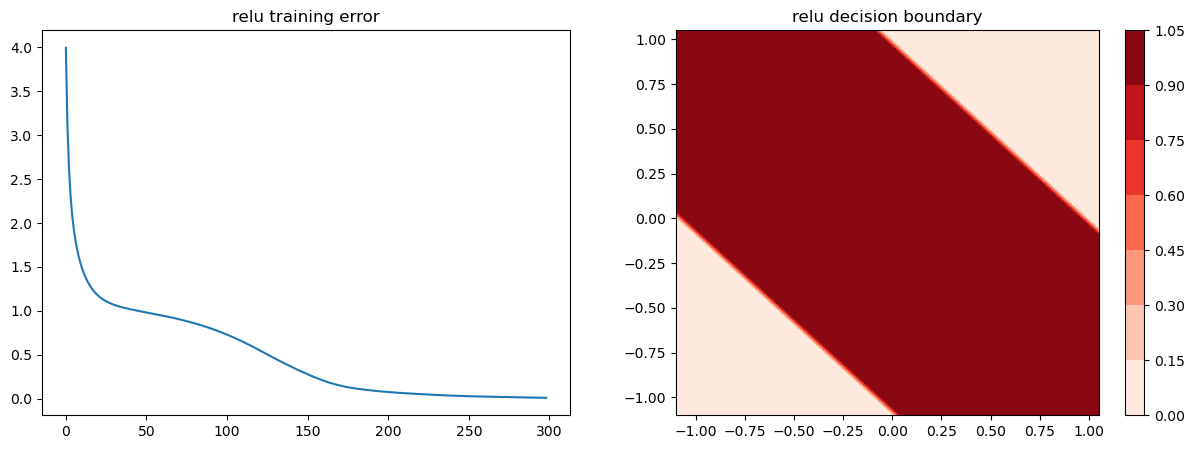

In [15]:
a,da = relu,d_relu
x1=np.where(x==0,-1,1)
w1,w2 = backpropagation(x1,w1,w2,y,a,da,lr=0.1)


xmin = x1.min()-0.1
xmax = x1.max()+0.1
x1_points = np.arange(xmin,xmax,0.05)
x2_points = np.arange(xmin,xmax,0.05)
xx,yy = np.meshgrid(x1_points,x2_points)
r1,r2 = xx.flatten().reshape(-1,1),yy.flatten().reshape(-1,1)
grid = np.hstack((r1,r2))

grid_vals = inference_a(grid,w1,w2,a)
grid_vals = np.where(grid_vals>0.5,1,0)
zz = grid_vals.reshape(xx.shape)
grid_vals.shape,zz.shape

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(losses_sigmoid)
plt.title("relu training error")

plt.subplot(122)
plt.contourf(xx,yy,zz,cmap='Reds')
plt.title("relu decision boundary")
plt.colorbar()
plt.plot()
plt.savefig("img/relu_training.png")
plt.show()

So basically relu cannot handle 0 very well (0 value and derivative) So i mapped the inputs to -1,1 and it works pretty well